<a href="https://colab.research.google.com/github/HarshGujarathi7/Data-Science-in-Finance--Independent-Study/blob/main/Fraud_Detection_Data_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# Taking 4 datsets from paper https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10535547/#sec3dot2-sensors-23-07788

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from sklearn.tree import ExtraTreeClassifier
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder


In [49]:
! wget -q -O ds3.csv https://drive.google.com/uc?id=1s2hGdSx62VtiFkeUdWdyktzcyRompz4A&export=download


In [50]:
ds3 = pd.read_csv("ds3.csv")

In [51]:
ds3.columns

Index(['Unnamed: 0', 'ID', 'GENDER', 'CAR', 'REALITY', 'NO_OF_CHILD', 'INCOME',
       'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE',
       'FLAG_MOBIL', 'WORK_PHONE', 'PHONE', 'E_MAIL', 'FAMILY SIZE',
       'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED', 'TARGET'],
      dtype='object')

In [52]:
ds3['TARGET'].value_counts()

,count
TARGET,
0,24712
1,422


In [53]:
ds3.head()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


In [54]:
ds3 = ds3.drop(columns=['Unnamed: 0', 'ID','FLAG_MOBIL'])

In [55]:
ds3.isna().sum()

,0
GENDER,0
CAR,0
REALITY,0
NO_OF_CHILD,0
INCOME,0
INCOME_TYPE,0
EDUCATION_TYPE,0
FAMILY_TYPE,0
HOUSE_TYPE,0
WORK_PHONE,0


In [56]:
ds3.nunique()

,0
GENDER,2
CAR,2
REALITY,2
NO_OF_CHILD,9
INCOME,195
INCOME_TYPE,5
EDUCATION_TYPE,5
FAMILY_TYPE,5
HOUSE_TYPE,6
WORK_PHONE,2


In [57]:
ds3.dtypes

,0
GENDER,object
CAR,object
REALITY,object
NO_OF_CHILD,int64
INCOME,float64
INCOME_TYPE,object
EDUCATION_TYPE,object
FAMILY_TYPE,object
HOUSE_TYPE,object
WORK_PHONE,int64


In [58]:
label_mappings = {}

for col in ds3.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    ds3[col] = le.fit_transform(ds3[col])
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

print(label_mappings)


{'GENDER': {'F': 0, 'M': 1}, 'CAR': {'N': 0, 'Y': 1}, 'REALITY': {'N': 0, 'Y': 1}, 'INCOME_TYPE': {'Commercial associate': 0, 'Pensioner': 1, 'State servant': 2, 'Student': 3, 'Working': 4}, 'EDUCATION_TYPE': {'Academic degree': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Secondary / secondary special': 4}, 'FAMILY_TYPE': {'Civil marriage': 0, 'Married': 1, 'Separated': 2, 'Single / not married': 3, 'Widow': 4}, 'HOUSE_TYPE': {'Co-op apartment': 0, 'House / apartment': 1, 'Municipal apartment': 2, 'Office apartment': 3, 'Rented apartment': 4, 'With parents': 5}}


In [59]:
label_mappings


{'GENDER': {'F': 0, 'M': 1},
 'CAR': {'N': 0, 'Y': 1},
 'REALITY': {'N': 0, 'Y': 1},
 'INCOME_TYPE': {'Commercial associate': 0,
  'Pensioner': 1,
  'State servant': 2,
  'Student': 3,
  'Working': 4},
 'EDUCATION_TYPE': {'Academic degree': 0,
  'Higher education': 1,
  'Incomplete higher': 2,
  'Lower secondary': 3,
  'Secondary / secondary special': 4},
 'FAMILY_TYPE': {'Civil marriage': 0,
  'Married': 1,
  'Separated': 2,
  'Single / not married': 3,
  'Widow': 4},
 'HOUSE_TYPE': {'Co-op apartment': 0,
  'House / apartment': 1,
  'Municipal apartment': 2,
  'Office apartment': 3,
  'Rented apartment': 4,
  'With parents': 5}}

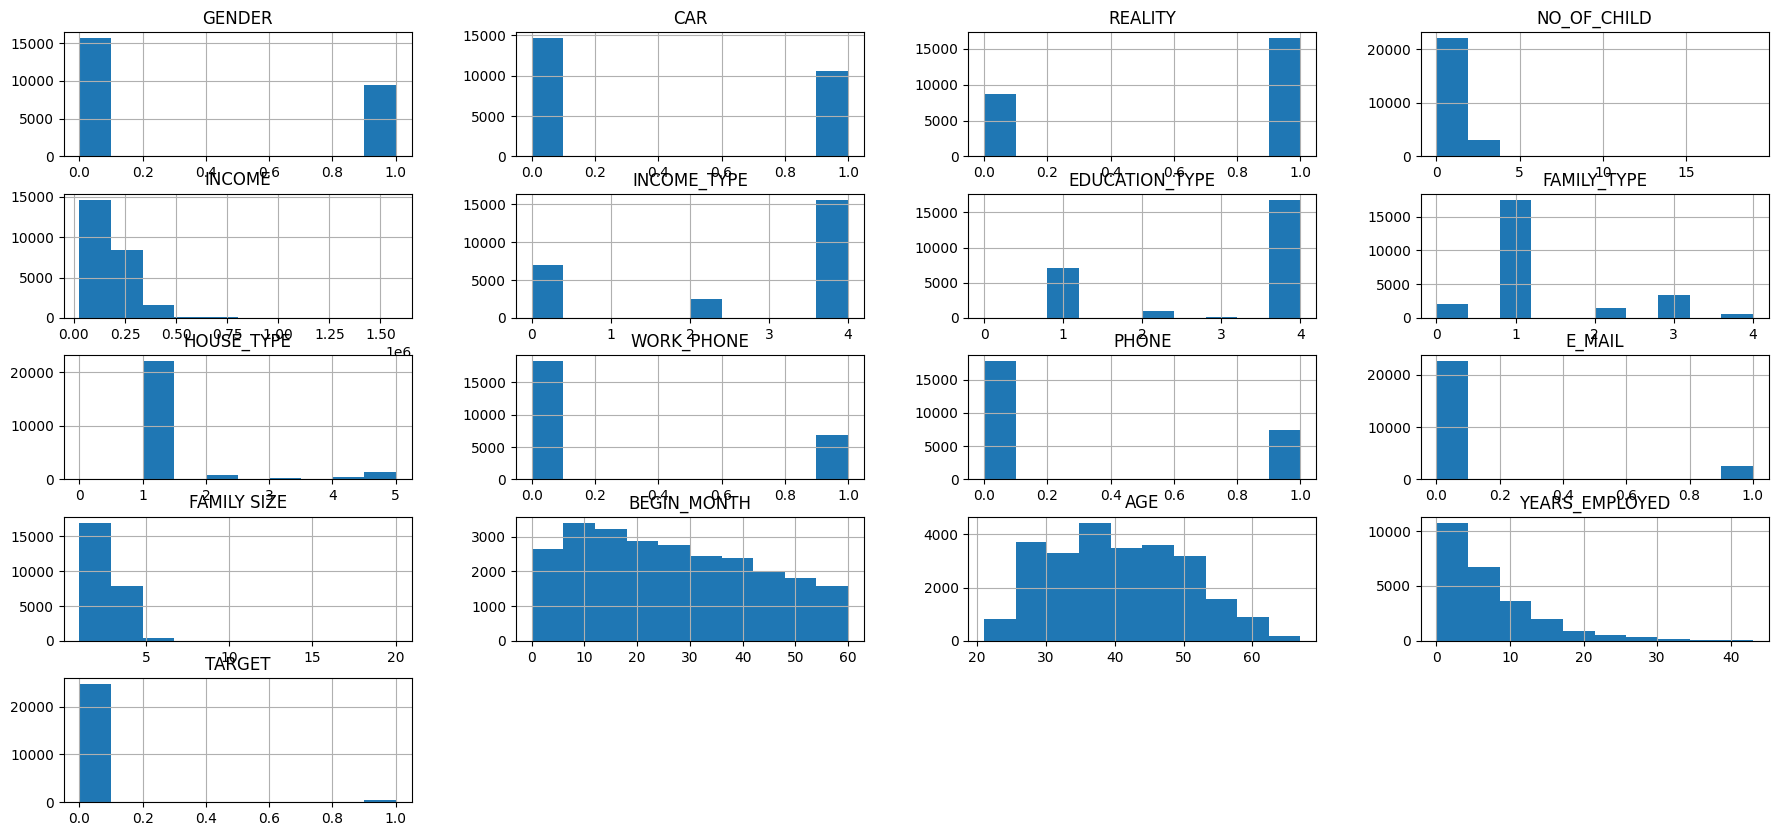

In [60]:
ds3.hist(figsize=(22,10))
plt.show()

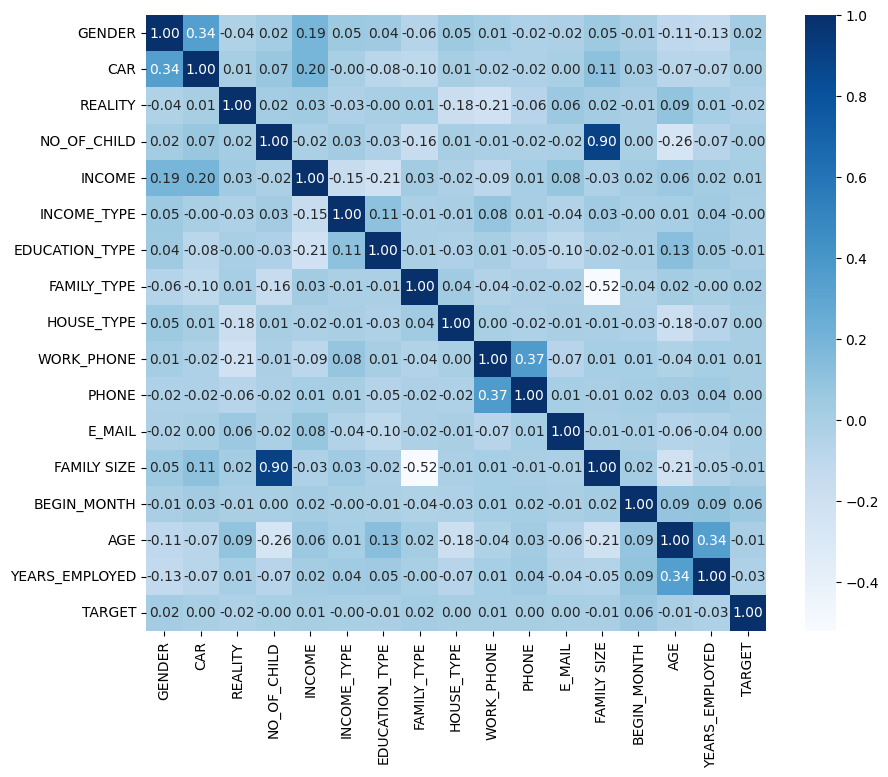

In [61]:
plt.figure(figsize=(10,8))
sns.heatmap(ds3.corr(),cmap="Blues",annot=True,fmt='.2f')
plt.show()

# there is no significant relationship w target variable :(

In [62]:
# visualizing categorical varas with more than 2 outcomes:

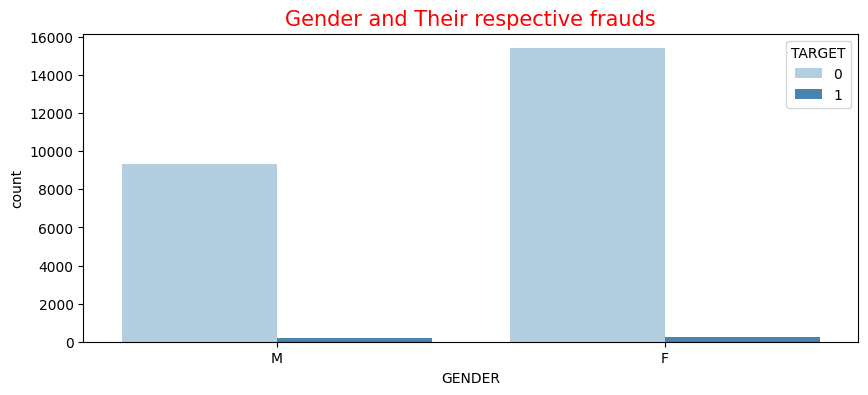

In [79]:
ds3['GENDER'] = ds3['GENDER'].map({0: 'F', 1: 'M'})

plt.figure(figsize=(10, 4))
sns.countplot(x="GENDER", hue="TARGET", data=ds3, palette="Blues")
plt.title("Gender and Their respective frauds", fontsize=15, color="Red")

ds3['GENDER'] = ds3['GENDER'].map({'F': 0, 'M': 1})

# Female has more fraudulent  cases as compared to men

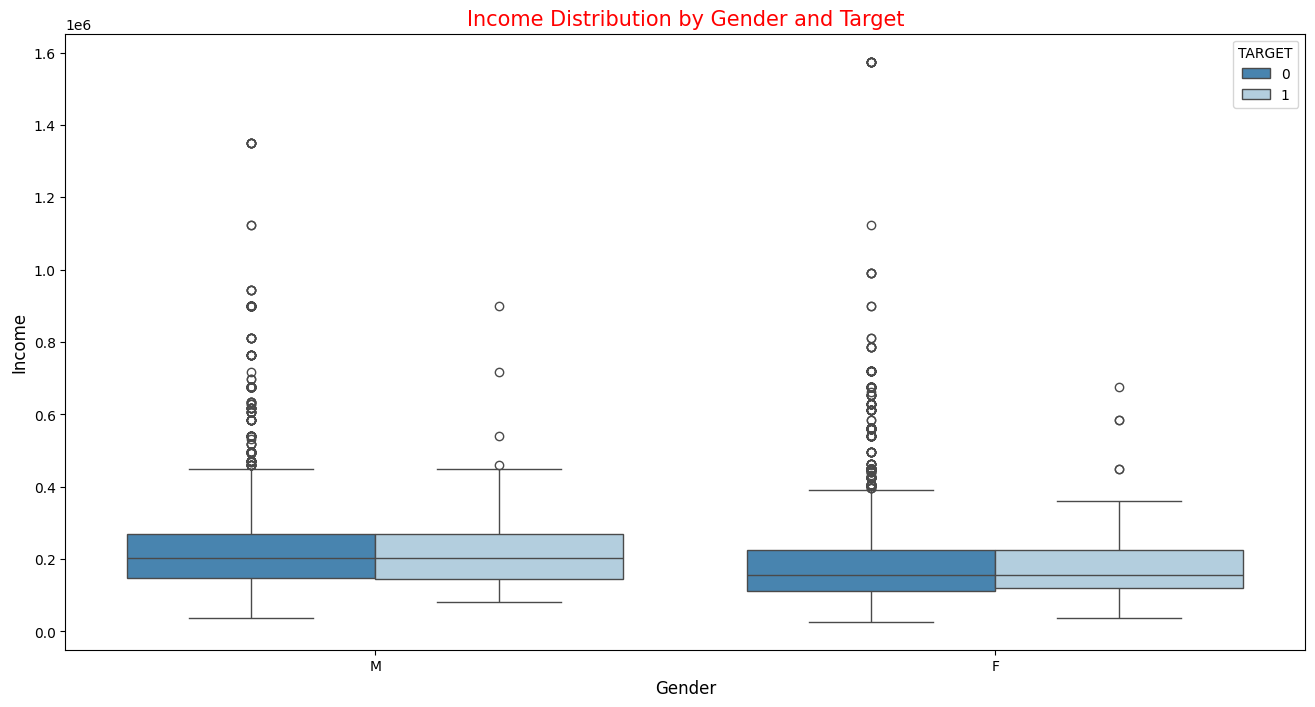

In [64]:
ds3['GENDER'] = ds3['GENDER'].map({0: 'F', 1: 'M'})

plt.figure(figsize=(16, 8))
sns.boxplot(x="GENDER", y="INCOME", hue="TARGET", data=ds3, palette="Blues_r")
plt.title("Income Distribution by Gender and Target", fontsize=15, color="Red")
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Income", fontsize=12)
plt.show()

ds3['GENDER'] = ds3['GENDER'].map({'F': 0, 'M': 1})

# Men's income has much more outlier as compared to woman's income


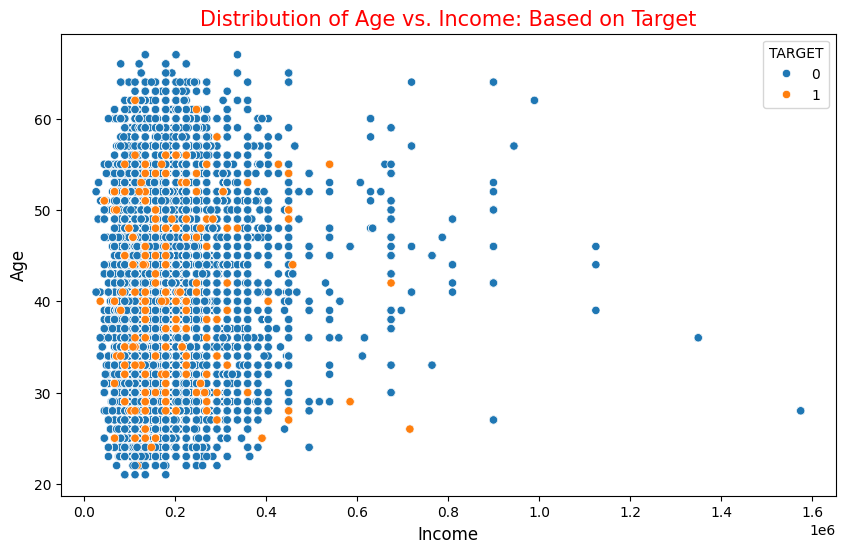

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="INCOME", y="AGE", hue="TARGET", data=ds3)
plt.title("Distribution of Age vs. Income: Based on Target", fontsize=15, color="Red")
plt.xlabel("Income", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.show()

# Income and Age is not related to each other in this dataset, also the target var seems random

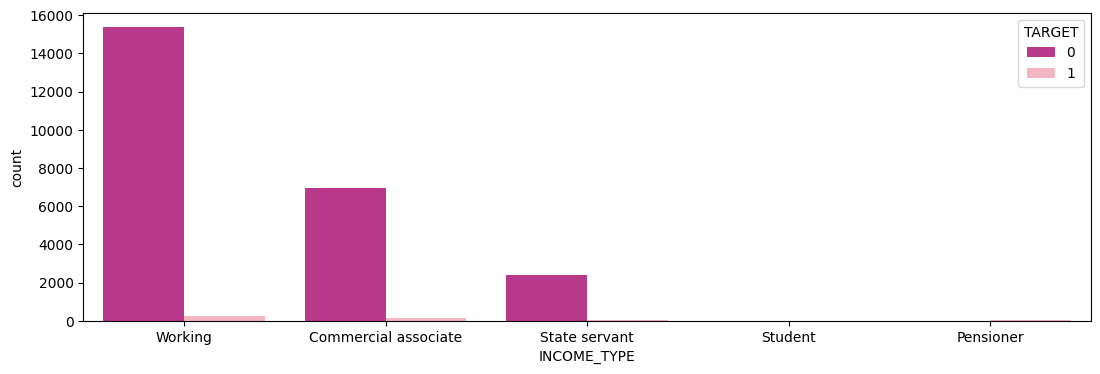

In [66]:
ds3['INCOME_TYPE'] = ds3['INCOME_TYPE'].map({v: k for k, v in label_mappings['INCOME_TYPE'].items()})
plt.figure(figsize=(13,4))
sns.countplot(x = "INCOME_TYPE",hue="TARGET",data=ds3,palette="RdPu_r")
plt.show()
ds3['INCOME_TYPE'] = ds3['INCOME_TYPE'].map(label_mappings['INCOME_TYPE'])

# Working people gets most scammed, it's true as they have more money.
# Also pensioner is more likely to get scammed but the data here is insufficent

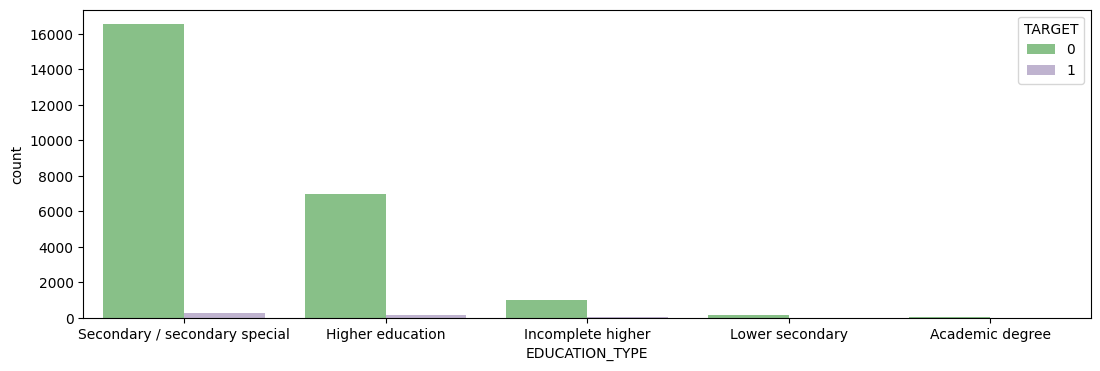

In [67]:
ds3['EDUCATION_TYPE'] = ds3['EDUCATION_TYPE'].map({v: k for k, v in label_mappings['EDUCATION_TYPE'].items()})

plt.figure(figsize=(13,4))
sns.countplot(x = "EDUCATION_TYPE",hue="TARGET",data=ds3,palette="Accent")
plt.show()

ds3['EDUCATION_TYPE'] = ds3['EDUCATION_TYPE'].map(label_mappings['EDUCATION_TYPE'])

# People w good education gets scammed more likely. as they can apply for a credit card and has more money.

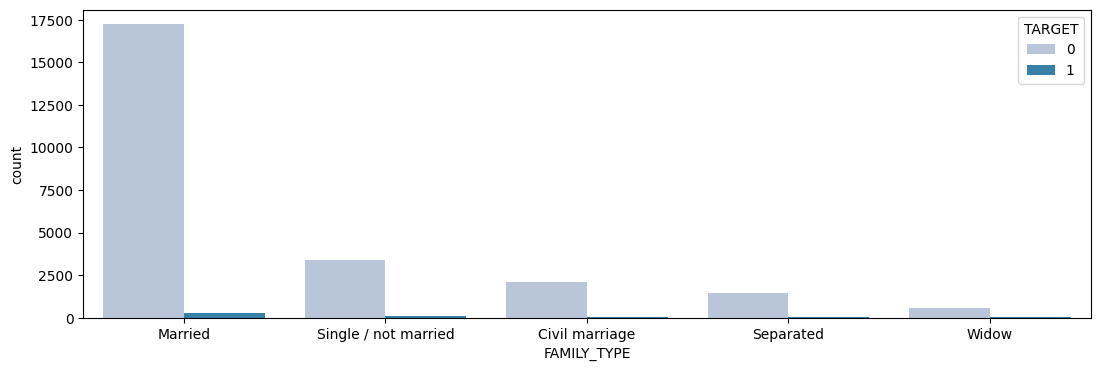

In [68]:
ds3['FAMILY_TYPE'] = ds3['FAMILY_TYPE'].map({v: k for k, v in label_mappings['FAMILY_TYPE'].items()})

plt.figure(figsize=(13,4))
sns.countplot(x = "FAMILY_TYPE",hue="TARGET",data=ds3,palette="PuBu")
plt.show()

ds3['FAMILY_TYPE'] = ds3['FAMILY_TYPE'].map(label_mappings['FAMILY_TYPE'])

# Married people gets scammed as compared to single.

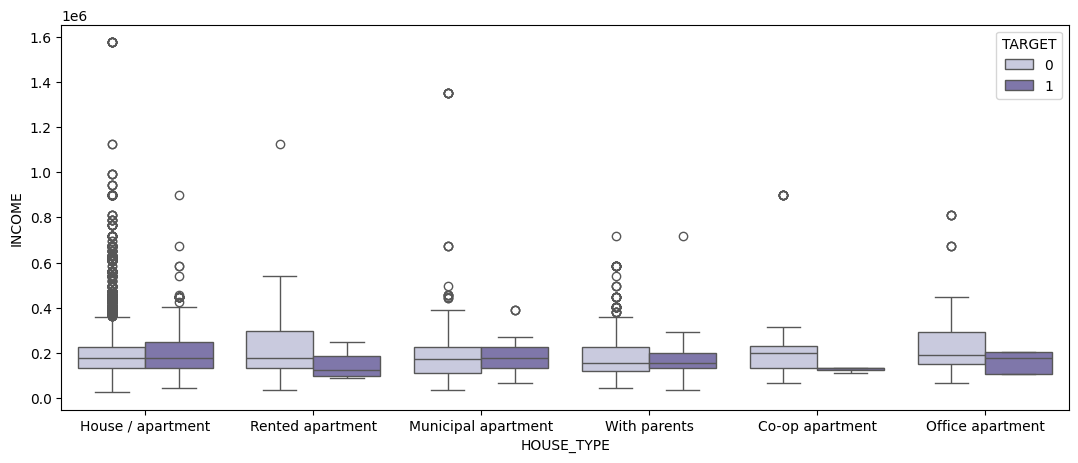

In [71]:
ds3['HOUSE_TYPE'] = ds3['HOUSE_TYPE'].map({v: k for k, v in label_mappings['HOUSE_TYPE'].items()})

plt.figure(figsize=(13,5))
sns.boxplot(x="HOUSE_TYPE",y="INCOME",data=ds3,hue="TARGET",palette="Purples")
plt.show()

ds3['HOUSE_TYPE'] = ds3['HOUSE_TYPE'].map(label_mappings['HOUSE_TYPE'])


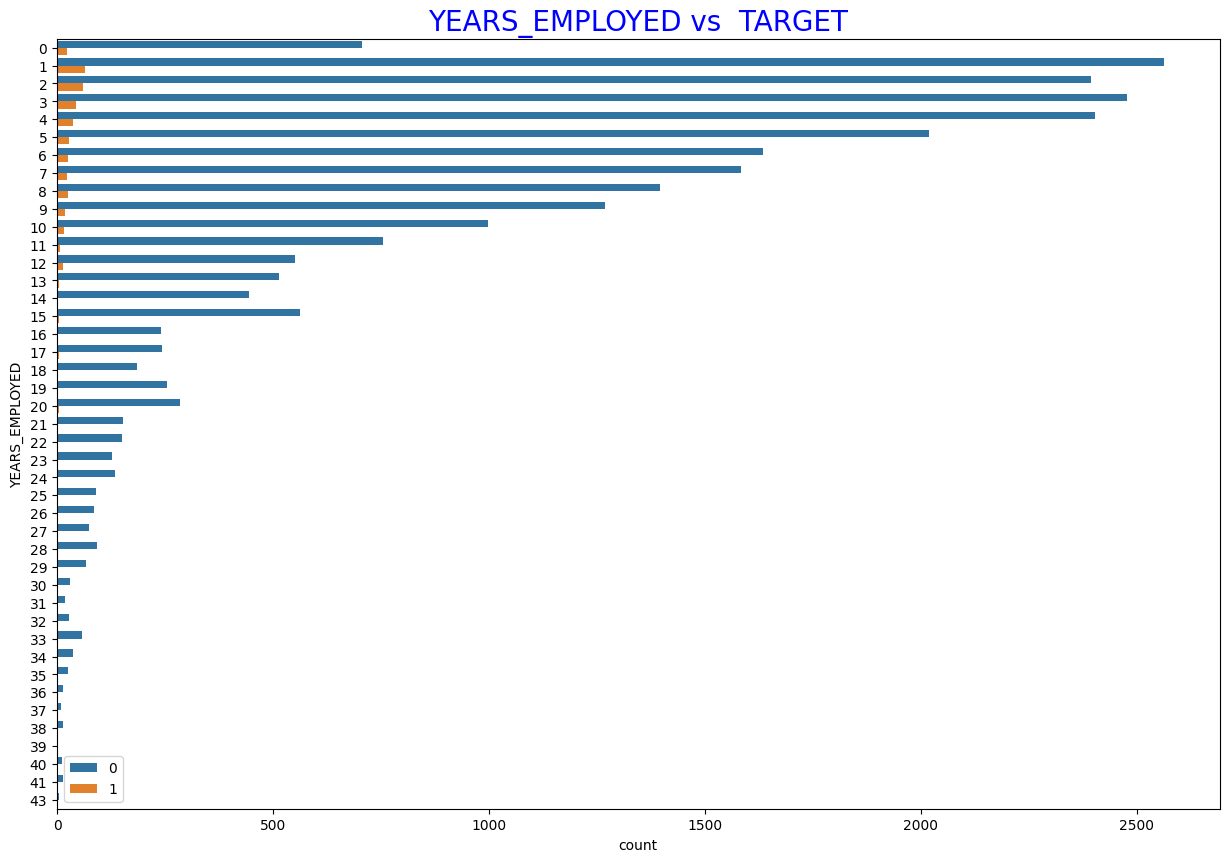

In [76]:
plt.figure(figsize=(15,10))
sns.countplot(y = "YEARS_EMPLOYED",hue="TARGET",data=ds3)
plt.title("YEARS_EMPLOYED vs  TARGET",fontsize=20,color="BLUE")
plt.legend()
plt.show()

# Most of the employees working experience lies between 1yrs to 15yrs. Countplot is more clustered in this region
# Fraudlent entries also lies in this region

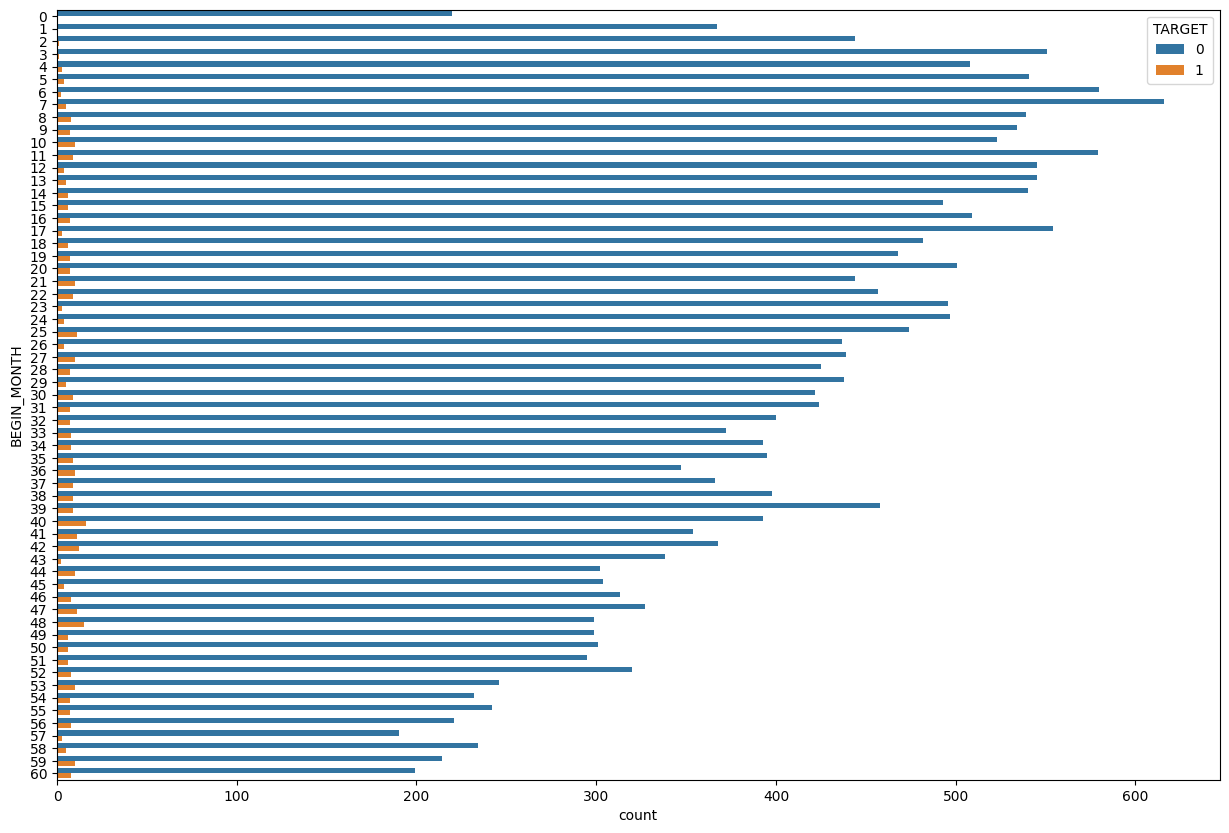

In [78]:
plt.figure(figsize=(15,10))
sns.countplot(y = "BEGIN_MONTH",hue="TARGET",data=ds3)
plt.show()

# More the data is older, more likely the scams are going to come out.

In [80]:
# GETTING OUTLIERS FOR CONTINOUS VARIABLES!

In [81]:
cont=ds3[["INCOME","BEGIN_MONTH","AGE","YEARS_EMPLOYED"]]

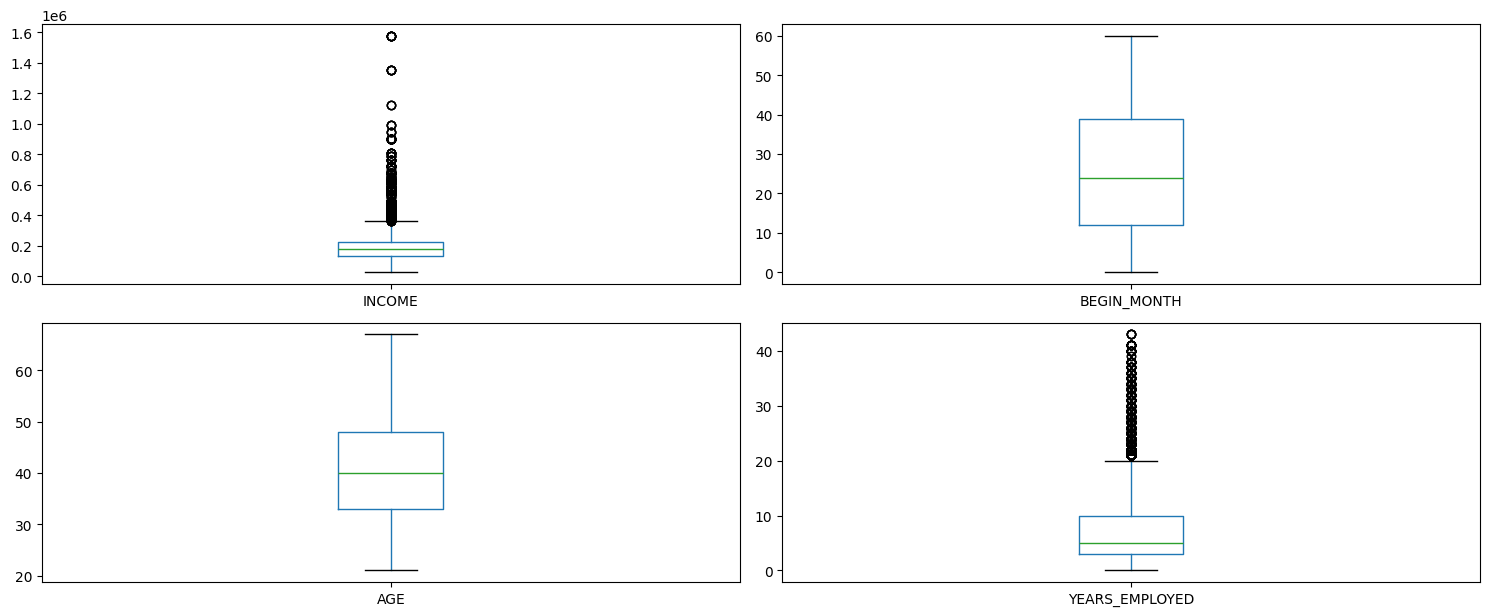

In [82]:
plt.figure(figsize=(15,12))
for i ,col in enumerate(list(cont.columns)):
    plt.subplot(4,2,i+1)
    cont.boxplot(col)
    plt.grid()
    plt.tight_layout()

    # Income and Years emp have huge number of outliers in them

<ipython-input-83-864e54c12d94>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cont[cols])
<ipython-input-83-864e54c12d94>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cont[cols])
<ipython-input-83-864e54c12d94>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in s

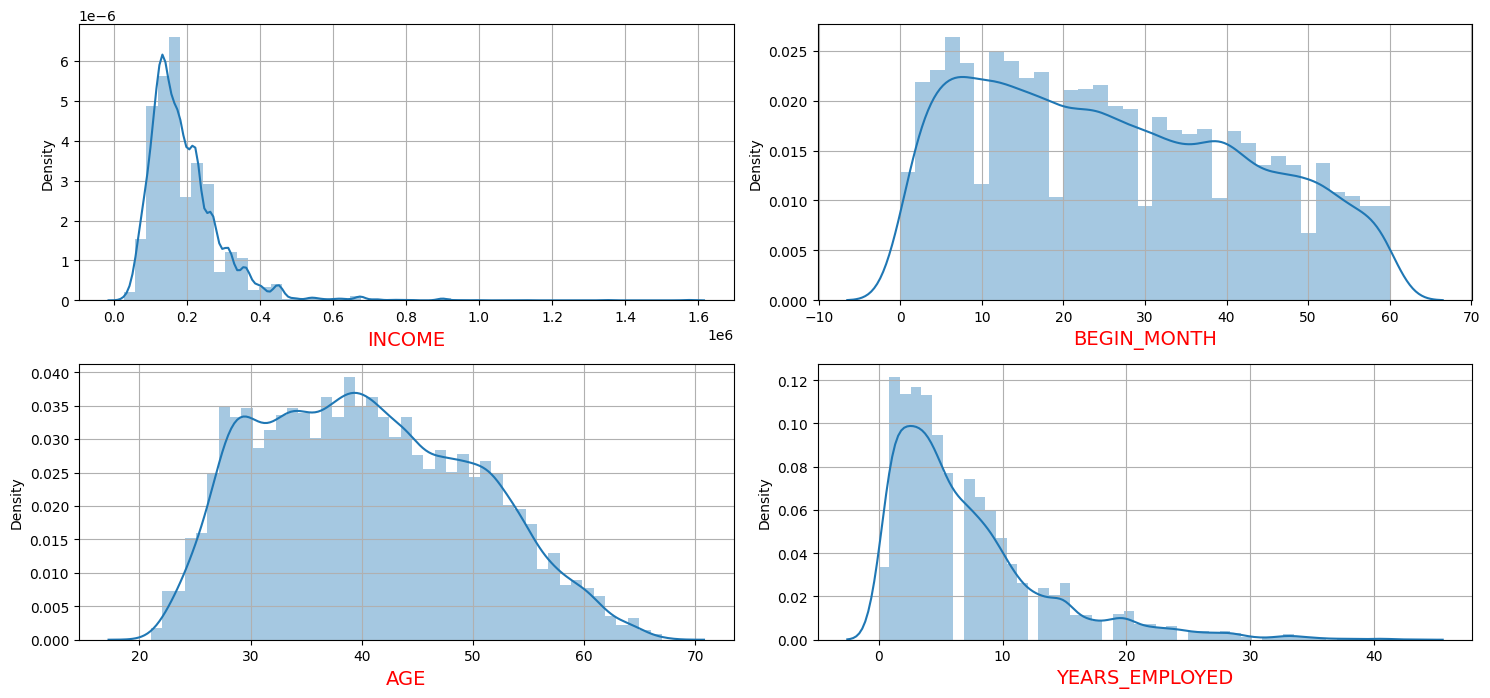

In [83]:
plt.figure(figsize=(15,10))

for i ,cols in enumerate(list(cont.columns)):
    plt.subplot(3,2,i+1)
    sns.distplot(cont[cols])
    plt.xlabel(cols,fontsize=14,color="Red")
    plt.grid()
    plt.tight_layout()

# Income and years emp shows some skewness as expected from boxplot .

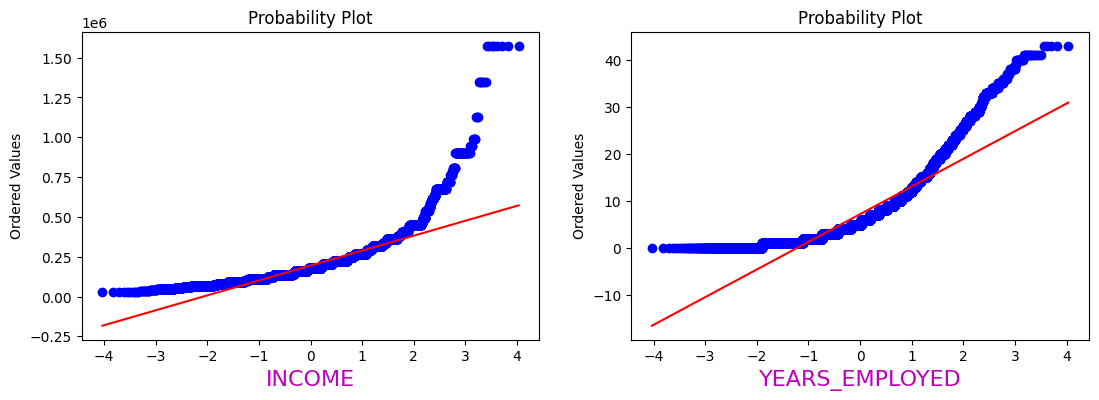

In [86]:
plt.figure(figsize=(13,4))

plt.subplot(121)
res=stats.probplot(ds3.INCOME,plot=plt,dist="norm")
plt.xlabel("INCOME",fontsize=16,color="m")

plt.subplot(122)
res=stats.probplot(ds3.YEARS_EMPLOYED,plot=plt,dist="norm")
plt.xlabel("YEARS_EMPLOYED",fontsize=16,color="m")

plt.show()

# Q-Q plot show all the points are not distributed uniformly for income
# As compared to INCOME, YEARS_EMPLOYED shows more disturbance in distribution.It has few outliers because high earning people also there

In [97]:
ds3=ds3[ds3['YEARS_EMPLOYED'] < 20]
ds3=ds3[ds3['INCOME'] < 600000]

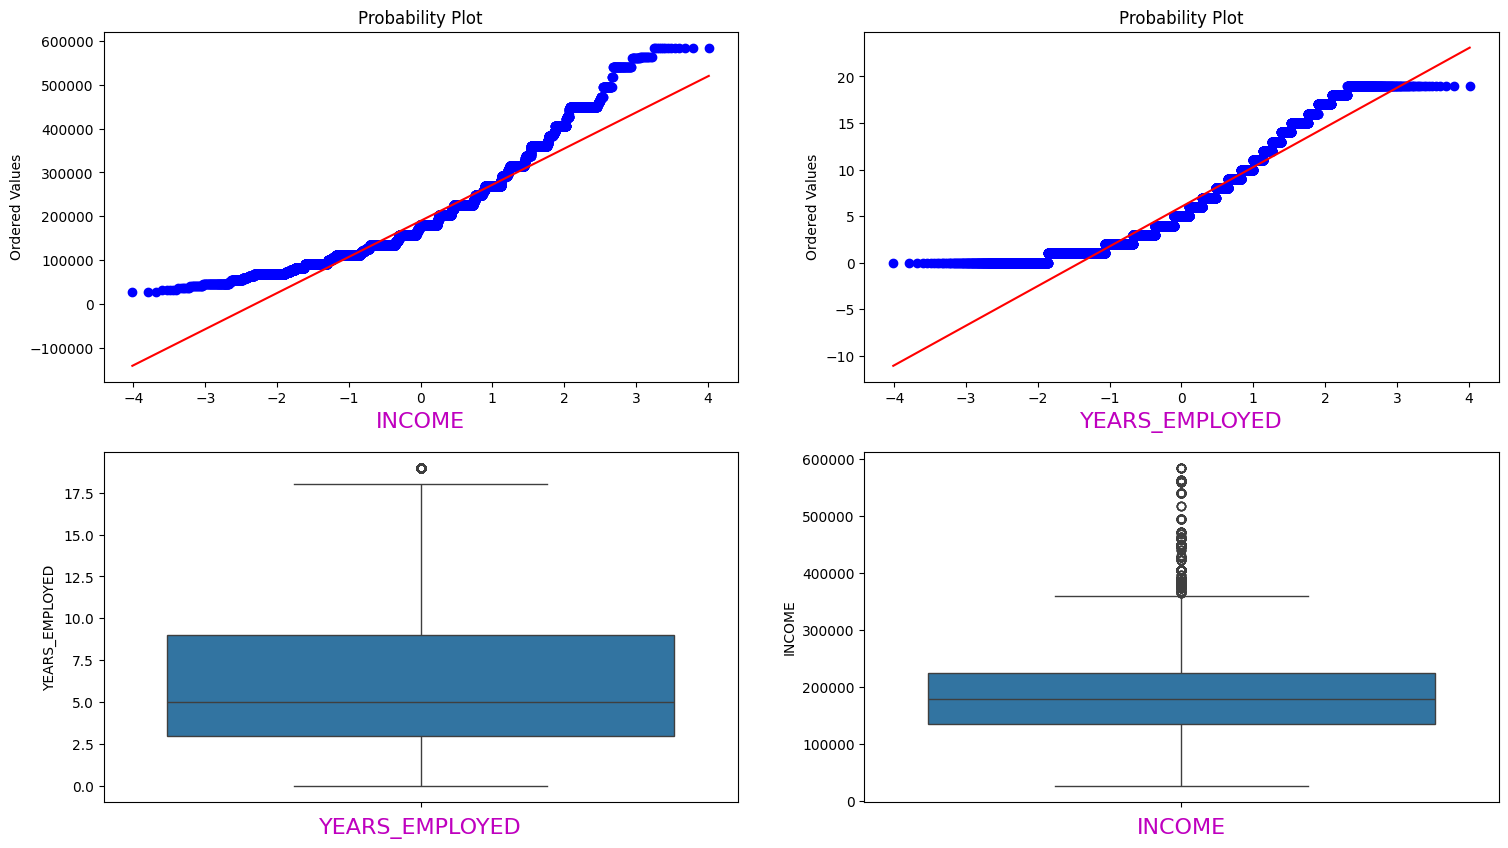

In [99]:
# after removing outliers:

plt.figure(figsize=(18,10))

plt.subplot(221)
res=stats.probplot(ds3.INCOME,plot=plt,dist="norm")
plt.xlabel("INCOME",fontsize=16,color="m")

plt.subplot(222)
res=stats.probplot(ds3.YEARS_EMPLOYED,plot=plt,dist="norm")
plt.xlabel("YEARS_EMPLOYED",fontsize=16,color="m")

plt.subplot(223)
sns.boxplot(ds3.YEARS_EMPLOYED)
plt.xlabel("YEARS_EMPLOYED",fontsize=16,color="m")

plt.subplot(224)
sns.boxplot(ds3.INCOME)
plt.xlabel("INCOME",fontsize=16,color="m")



plt.show()


In [101]:
# Model

In [102]:
X=ds3.drop("TARGET",axis=1)
y=ds3.TARGET

In [103]:
model=ExtraTreeClassifier()
model.fit(X,y)

ExtraTreeClassifier()

In [104]:
print(model.feature_importances_)

[0.03215534 0.0301701  0.02298986 0.02144754 0.13951982 0.03326052
 0.04809184 0.01814513 0.02764331 0.01478916 0.00125422 0.02236202
 0.03407575 0.2887806  0.13973597 0.1255788 ]


In [105]:
feat=pd.Series(model.feature_importances_,index=X.columns)
feats=feat.to_frame().reset_index()
feats.columns=["Features","Scores"]
features=feats.sort_values(by="Scores",ascending=False)
top_features=features.nlargest(12,"Scores")
top_features

,Features,Scores
13,BEGIN_MONTH,0.288781
14,AGE,0.139736
4,INCOME,0.139520
15,YEARS_EMPLOYED,0.125579
6,EDUCATION_TYPE,0.048092
12,FAMILY SIZE,0.034076
5,INCOME_TYPE,0.033261
0,GENDER,0.032155
1,CAR,0.030170
8,HOUSE_TYPE,0.027643


In [107]:
new_data=ds3[["GENDER","BEGIN_MONTH","AGE","INCOME","YEARS_EMPLOYED","FAMILY SIZE","INCOME_TYPE","FAMILY_TYPE","WORK_PHONE","PHONE","HOUSE_TYPE","EDUCATION_TYPE","TARGET"]]

In [111]:
new_data.nunique()

,0
GENDER,2
BEGIN_MONTH,61
AGE,47
INCOME,169
YEARS_EMPLOYED,20
FAMILY SIZE,10
INCOME_TYPE,5
FAMILY_TYPE,5
WORK_PHONE,2
PHONE,2


In [118]:
dummy_data=pd.get_dummies(new_data,columns=["GENDER","FAMILY SIZE","INCOME_TYPE","FAMILY_TYPE","WORK_PHONE","PHONE","HOUSE_TYPE","EDUCATION_TYPE"],drop_first=True)

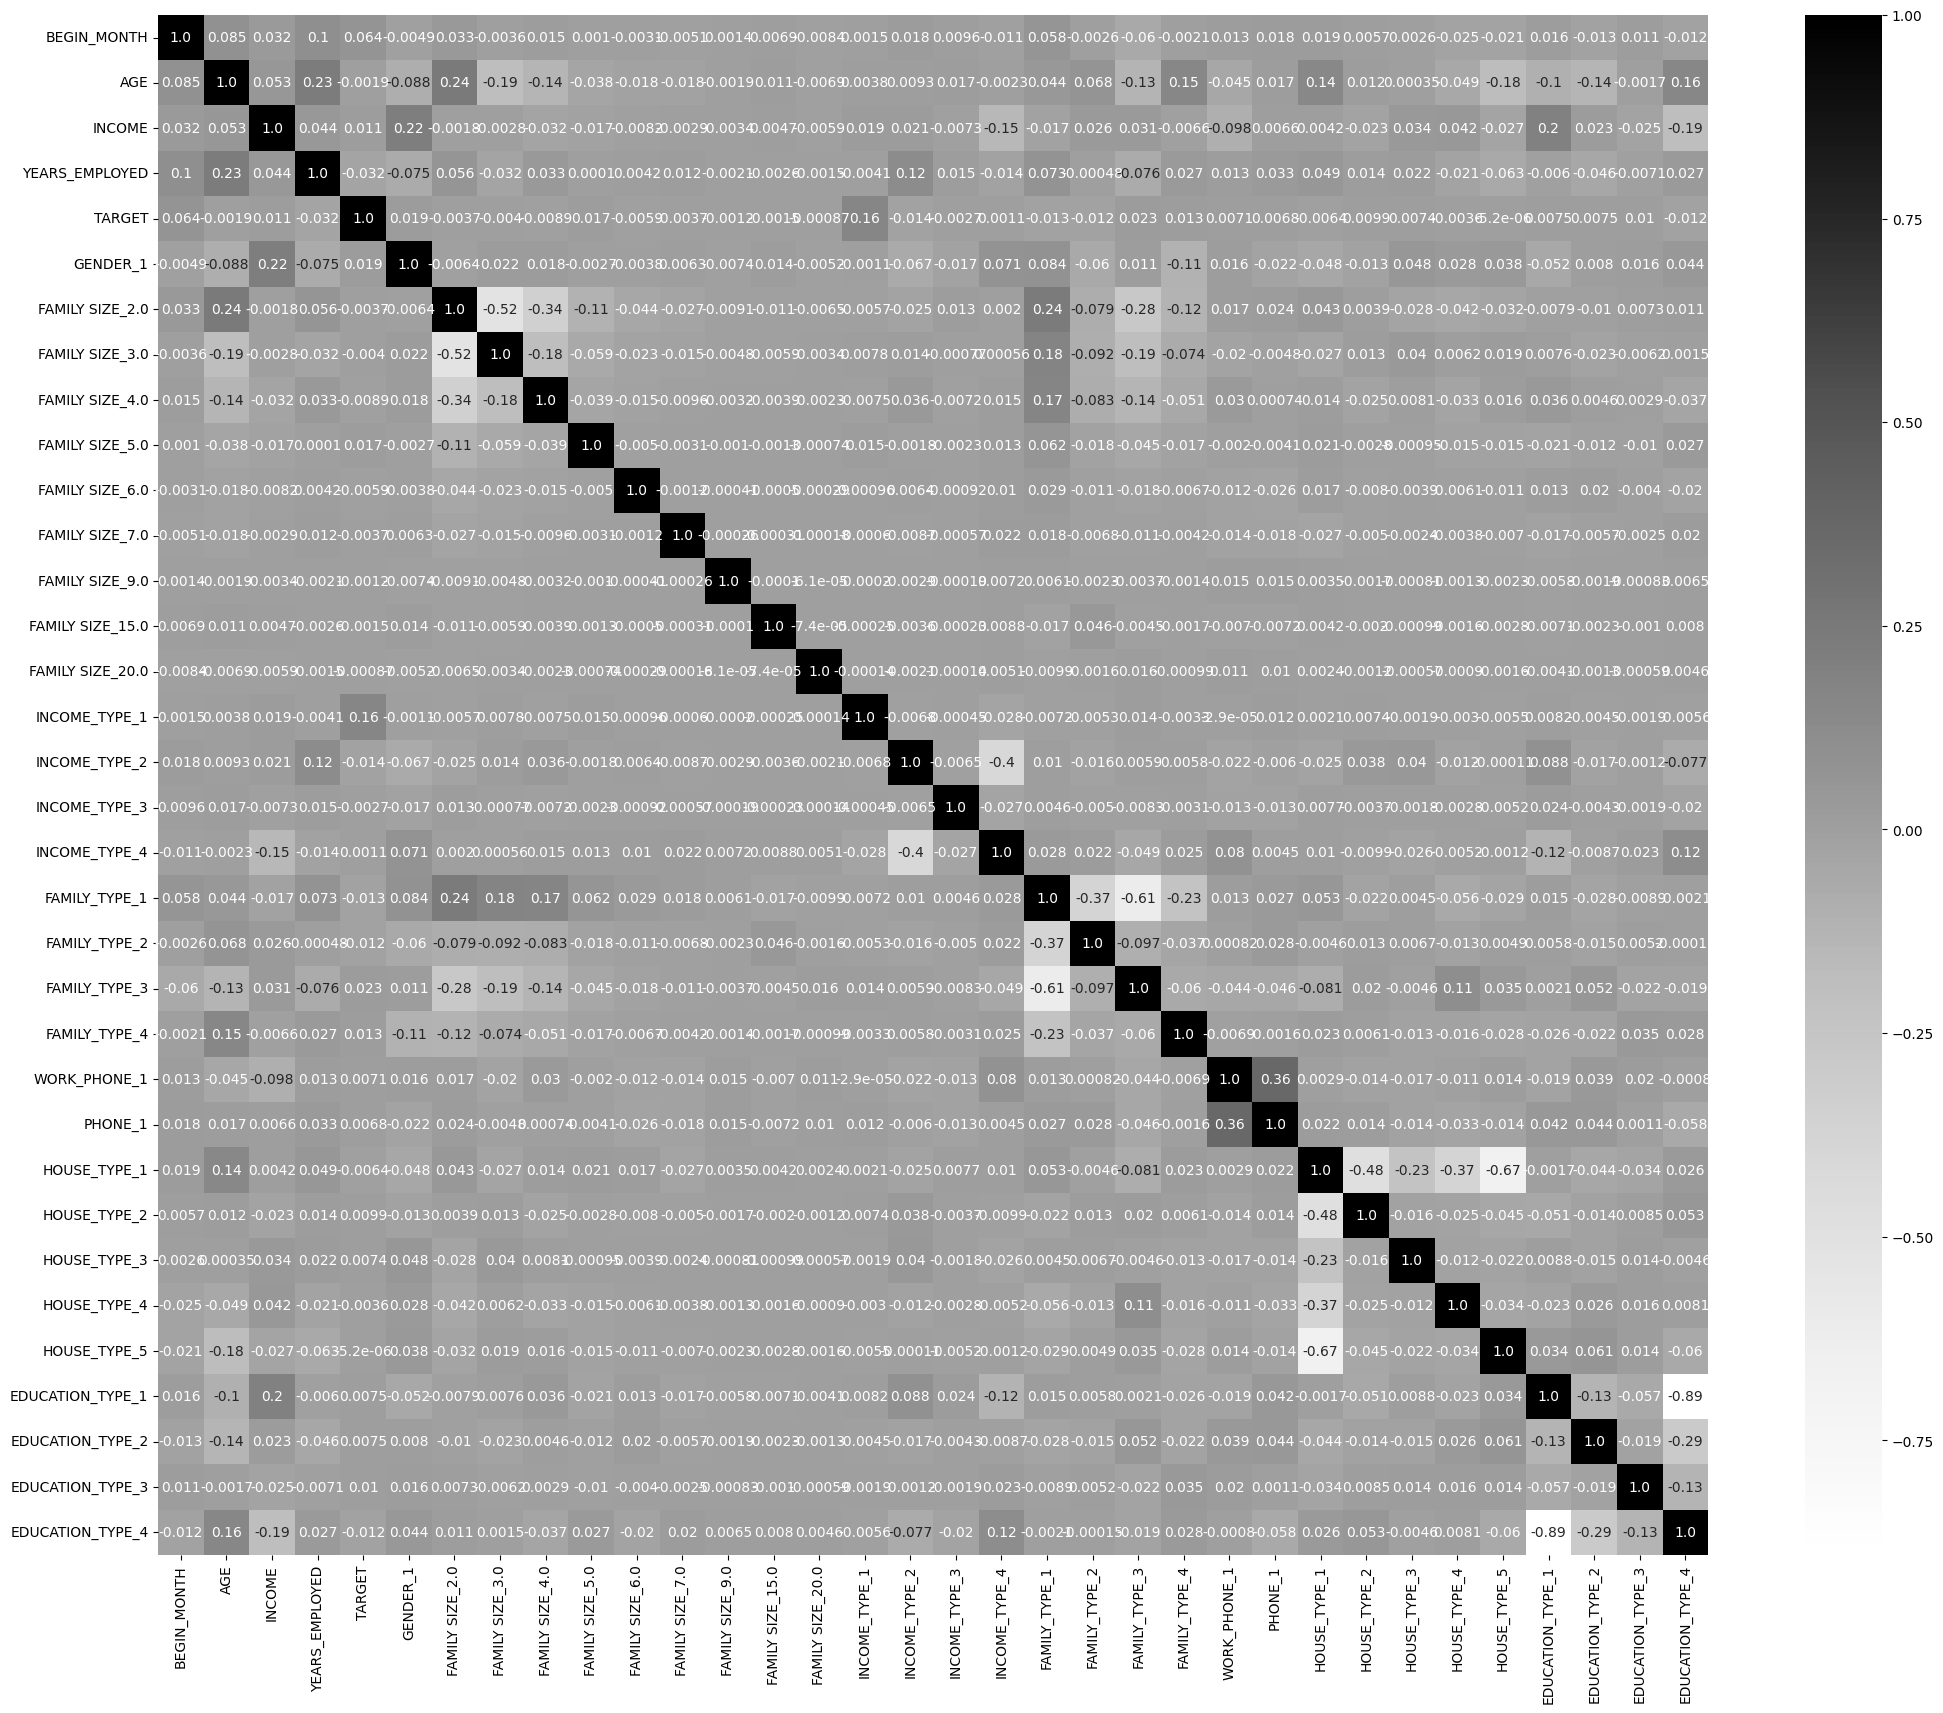

In [123]:
plt.figure(figsize=(25,20))
sns.heatmap(dummy_data.corr(),fmt='.2',annot=True,cmap="Greys")
plt.show()
